## Investigating magma properties and changes during fractional crystallization
- This is an example for EPS 214  - Advanced Volcanology at Berkeley

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt


In [2]:
#!pip install --upgrade PetThermoTools
import PetThermoTools as M

In [3]:
import sys
sys.path.append(r'MELTS')

In [4]:
M.__version__

'0.2.9'

In [5]:
basalt = {'SiO2_Liq': 48.82,
       'TiO2_Liq': 1.45,
       'Al2O3_Liq': 13.46,
       'FeOt_Liq': 12.79,
       'MgO_Liq': 7.32,
       'CaO_Liq': 11.84,
       'Na2O_Liq':1.87,
       'K2O_Liq': 0.17,
       'H2O_Liq': 0,
       'MnO_Liq': 0, 
       'P2O5_Liq': 0, 
       'Fe3Fet_Liq': 0.1}

rhy = {'SiO2_Liq': 77.6,
       'TiO2_Liq': 0.09,
       'Al2O3_Liq': 12.3,
       'FeOt_Liq': 0.65,
       'MgO_Liq': 0.02,
       'CaO_Liq': 0.41,
       'Na2O_Liq': 4.49,
       'K2O_Liq': 4.69,
       'H2O_Liq': 0,
        'MnO_Liq': 0, 
       'P2O5_Liq': 0,
       'Fe3Fet_Liq': 0.1}


In [6]:
basalt_df = pd.DataFrame([basalt])
Viscosity_basalt=pt.calculate_viscosity_giordano_2008(liq_comps=basalt_df,  T_K=1200+273.15, H2O_Liq=0, F2O_content=0)
Viscosity_basalt


Water content from input overridden


,n_melt,logn_melt,T_K,A,B,C,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,...,b13,c1,c2,c3,c4,c5,c6,c11,T_K,logn_melt
0,42.516856,1.628561,1473.15,-4.55,5242.523032,624.647749,48.82,1.45,13.46,12.79,...,303.507819,142.735441,150.792602,191.142247,137.570831,-25.103977,-0.0,27.510605,1473.15,1.628561


In [7]:
rhy_df = pd.DataFrame([rhy])
Viscosity_rhy=pt.calculate_viscosity_giordano_2008(liq_comps=rhy_df,  T_K=850+273.15, H2O_Liq=0, F2O_content=0)
Viscosity_rhy


Water content from input overridden


,n_melt,logn_melt,T_K,A,B,C,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,...,b13,c1,c2,c3,c4,c5,c6,c11,T_K,logn_melt
0,4.337321e+09,9.637222,1123.15,-4.55,11874.557577,286.160352,77.6,0.09,12.3,0.65,...,1078.148547,228.790808,123.300873,5.114944,4.803981,-96.771705,-0.0,20.92145,1123.15,9.637222


## Now try adding 4 wt% H2O to the rhyolite
- You can do this by editing H2O_Liq=... in the function

In [8]:
Viscosity_rhy_4wt=pt.calculate_viscosity_giordano_2008(liq_comps=rhy_df,  T_K=850+273.15, H2O_Liq=4, F2O_content=0)
Viscosity_rhy_4wt


Water content from input overridden


,n_melt,logn_melt,T_K,A,B,C,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,...,b13,c1,c2,c3,c4,c5,c6,c11,T_K,logn_melt
0,79318.848757,4.899376,1123.15,-4.55,10480.850008,13.992151,77.6,0.09,12.3,0.65,...,816.14189,199.059132,107.277757,4.45025,4.179698,-84.19609,-262.657176,45.87858,1123.15,4.899376


In [9]:
print('Dry Rhyolite is NX more viscous, where N is....')
Viscosity_rhy['n_melt']/Viscosity_rhy_4wt['n_melt']

Dry Rhyolite is NX more viscous, where N is....


0    54682.097237
Name: n_melt, dtype: float64

## Now try upping the temperature by 50K

In [10]:
Viscosity_rhy_4wt_Hotter=pt.calculate_viscosity_giordano_2008(liq_comps=rhy_df,  T_K=850+273.15+50, H2O_Liq=4, F2O_content=0)
Viscosity_rhy_4wt_Hotter


Water content from input overridden


,n_melt,logn_melt,T_K,A,B,C,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,...,b13,c1,c2,c3,c4,c5,c6,c11,T_K,logn_melt
0,31029.857655,4.49178,1173.15,-4.55,10480.850008,13.992151,77.6,0.09,12.3,0.65,...,816.14189,199.059132,107.277757,4.45025,4.179698,-84.19609,-262.657176,45.87858,1173.15,4.49178


In [11]:
print('Dry Wet Rhyolite is NX more viscous than Hot Wet Rhyolite where N is....')
Viscosity_rhy_4wt['n_melt']/Viscosity_rhy_4wt_Hotter['n_melt']

Dry Wet Rhyolite is NX more viscous than Hot Wet Rhyolite where N is....


0    2.556211
Name: n_melt, dtype: float64

## Now lets look at what phases are stabilized in MELTS

### First - lets find the liquidus for a given compositions

In [12]:
Liq=M.findLiq_multi(Model='MELTSv1.0.2', bulk=basalt, T_initial_C=np.array([1200, 1200]), P_bar=np.array([1000, 2000]),
                     H2O_Liq=1, fO2_buffer=None)
Liq

  0%|          | 0/1 [00:00<?, ?it/s]

Setting calculation mode to rhyolite-MELTS 1.0.2.Setting calculation mode to rhyolite-MELTS 1.0.2.



Processed line... suppress: rutile Processed line... suppress: rutile Processed line... suppress: tridymite Processed line... suppress: tridymite ...-->Solving quadratic minimization Iter: 1.
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =   1.79352e-14, sNorm =      0.487827
...-->rNorm =   1.79352e-14, sNorm =      0.487827
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =   1.79352e-14, sNorm =      0.487827
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =   1.79352e-14, sNorm =      0.487827
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =   1.79352e-14, sNorm =      0.487827
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =   1.79352e-14, sNorm =      0.487827
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =   1.79352e-14, sNorm =      0.487827
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =   1.79352e-14, sNorm =      0.487827
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =   1.79352e-14, sNo

...Checking saturation state of potential solids....Checking saturation state of potential solids.

...Projecting equality constraints....Projecting equality constraints.

...Minimizing the thermodynamic potential.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
<> Stable liquid solid assemblage achiev

/Users/gleesonm/Library/CloudStorage/GoogleDrive-gleesonm@berkeley.edu/My Drive/2022/GitHub/PetThermoTools/src/PetThermoTools/Liq.py:495: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'clinopyroxene1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  Results.loc[index] = Res
/Users/gleesonm/Library/CloudStorage/GoogleDrive-gleesonm@berkeley.edu/My Drive/2022/GitHub/PetThermoTools/src/PetThermoTools/Liq.py:495: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  Results.loc[index] = Res


,T_Liq,liquidus_phase,fluid_saturated,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,CO2_Liq,Fe3Fet_Liq
0,1163.8,clinopyroxene1,No,49.382193,1.466698,13.615,12.936475,0.0,7.404294,11.976345,1.891534,0.171958,0.0,1.011516,0.0,0.099944
1,1181.6,clinopyroxene1,No,49.382193,1.466698,13.615,12.936475,0.0,7.404294,11.976345,1.891534,0.171958,0.0,1.011516,0.0,0.099944


## Now lets calculate the phases 60-80C below the liquidus

In [13]:
dict=M.equilibrate_multi(Model='MELTSv1.0.2', bulk=basalt, T_C=1100, P_bar=1000, H2O_Liq=1, fO2_buffer=None)


  0%|          | 0/1 [00:00<?, ?it/s]

Setting calculation mode to rhyolite-MELTS 1.0.2.
...Checking saturation state of potential solids.
...Adding the solid phase clinopyroxene to the assemblage.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Adding the solid phase plagioclase to the assemblage.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Adding the solid phase olivine to the assemblage.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
['liquid1', 'olivine1', 'clinopyroxene1', 'plagioclase1']


Processed line... suppress: rutile Processed line... suppress: tridymite ...-->Solving quadratic minimization Iter: 1.
...-->rNorm =      0.184417, sNorm =      0.377116
...-->Linear search: Min =  -1.54395e+06, step =      0.662177
...-->Solving quadratic minimization Iter: 2.
...-->rNorm =     0.0183978, sNorm =      0.399417
...-->Linear search: Min =  -1.54399e+06, step =       1.61641
...-->Solving quadratic minimization Iter: 3.
...-->rNorm =    0.00714892, sNorm =      0.389448
...-->Linear search: Min =  -1.54399e+06, step =      0.978033
...-->Solving quadratic minimization Iter: 4.
...-->rNorm =   0.000122211, sNorm =      0.389577
...-->Linear search: Min =  -1.54399e+06, step =             1
...-->Solving quadratic minimization Iter: 5.
...-->rNorm =   1.34313e-07, sNorm =      0.389577
...-->Linear search: Min =  -1.54399e+06, step =         0.975
...-->Solving quadratic minimization Iter: 6.
...-->rNorm =   3.35811e-09, sNorm =      0.389577
...-->Linear search: Min =  -1

In [14]:
# Here are the output keys on the dictionary
dict.keys()

dict_keys(['Conditions', 'liquid1', 'liquid1_prop', 'olivine1', 'olivine1_prop', 'clinopyroxene1', 'clinopyroxene1_prop', 'plagioclase1', 'plagioclase1_prop', 'All', 'Mass', 'Volume', 'rho'])

In [15]:
# This tells you the mass of different phases for your 100g of system. 
dict['Mass']

,liquid1,olivine1,clinopyroxene1,plagioclase1
0,67.182766,1.113803,25.085893,5.479086


In [16]:
len(np.where(dict['Conditions']['T_C'] == 0.0)[0])

0

### Lets calculate the viscosity for this new system

In [17]:
Viscosity=pt.calculate_viscosity_giordano_2008(liq_comps=dict['All'],  T_K=dict['All']['T_C']+273.15, H2O_Liq=0, F2O_content=0)
Viscosity

Water content from input overridden


,n_melt,logn_melt,T_K,A,B,C,T_C,P_bar,g,h,...,b13,c1,c2,c3,c4,c5,c6,c11,T_K,logn_melt
0,498.443802,2.697616,1373.15,-4.55,5505.745872,613.486999,1100.0,1000.0,-1.544002e+06,-1.197449e+06,...,495.217734,148.072247,178.840147,176.535107,109.313079,-34.950506,-0.0,35.676926,1373.15,2.697616


## Lets investigate phase stability as a function of water content

In [18]:
Isobaric_Xtal = M.isobaric_crystallisation(Model = "MELTSv1.2.0",
                                           bulk = basalt,
                                           find_liquidus = True,
                                           P_bar = 1000,
                                           H2O_Liq= np.array([0.2, 1, 2, 3, 4]),
                                           T_end_C = 900,
                                           dt_C = 2,
                                           fO2_buffer = "FMQ",
                                           fO2_offset = -1.0,
                                           Frac_solid = True,
                                           Frac_fluid = True,
                                           label = "water")

  0%|          | 0/1 [00:00<?, ?it/s]

Running MELTSv1.2.0 calculations 0 to 4.0 ...Setting calculation mode to rhyolite-MELTS 1.2.0.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Projecting equa

Processed line... suppress: rutile Processed line... suppress: tridymite Processed line... log fo2 path: fmq Processed line... log fo2 offset: -1.0 ...-->Solving quadratic minimization Iter: 1.
...-->rNorm =             0, sNorm =      0.493962
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =             0, sNorm =      0.493964
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =             0, sNorm =      0.493967
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =             0, sNorm =       0.49397
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =             0, sNorm =      0.493972
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =             0, sNorm =      0.493975
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =             0, sNorm =      0.493978
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =             0, sNorm =      0.493981
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =             0, s

<> Stable liquid solid assemblage achieved.
<> Stable liquid solid assemblage achieved.
<> Stable liquid solid assemblage achieved.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
Current state of the system recorded in _tbl.txt files.
Current state of the system recorded in _tbl.txt files.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
<> Stable liquid solid assemblage achieved.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential 

...-->Solving quadratic minimization Iter: 1.
...-->rNorm =             0, sNorm =      0.493181
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =             0, sNorm =      0.494306
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =   9.70382e-05, sNorm =      0.504867
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =             0, sNorm =      0.497583
...-->Linear search: Min =       -793136, step =       1.00055
...-->Solving quadratic minimization Iter: 2.
...-->rNorm =    2.4671e-08, sNorm =      0.504867
...-->Linear search: Min =       -793136, step =       1.21384
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =   9.76112e-05, sNorm =      0.506463
...-->Linear search: Min =       -790325, step =       1.00043
...-->Solving quadratic minimization Iter: 3.
...-->rNorm =   5.27566e-09, sNorm =      0.504867
...-->Linear search: Min =       -793136, step =      0.977455
...-->Solving quadratic minimization Iter: 2.
...-->rNorm =   1.31363

...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Projecting equality constraints.
<> Stable liquid solid assemblage achieved.
...Minimizing the thermodynamic potential.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodyn

...-->Solving quadratic minimization Iter: 4.
...-->rNorm =   3.57992e-10, sNorm =      0.488717
...-->Linear search: Min =       -756584, step =         0.975
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =   0.000116644, sNorm =      0.507776
...-->Linear search: Min =       -772183, step =             1
...-->Solving quadratic minimization Iter: 5.
...-->rNorm =   8.99676e-12, sNorm =      0.488717
...-->Linear search: Min =       -756584, step =           1.1
...-->Solving quadratic minimization Iter: 2.
...-->rNorm =   4.08365e-08, sNorm =      0.507776
...-->Linear search: Min =       -772183, step =       1.17308
...-->Solving quadratic minimization Iter: 6.
...-->rNorm =   8.57531e-13, sNorm =      0.488717
...-->Solving quadratic minimization Iter: 3.
...-->rNorm =   7.06784e-09, sNorm =      0.507776
...-->Linear search: Min =       -772183, step =       1.10938
...-->Solving quadratic minimization Iter: 4.
...-->rNorm =   7.73044e-10, sNorm =      0.507776
...-->

...Projecting equality constraints.
...Minimizing the thermodynamic potential.
<> Stable liquid solid assemblage achieved.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
<> Stable liquid solid assemblage achieved.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
Current state of the system recorded in _tbl.txt files.
...Checking s

...-->Solving quadratic minimization Iter: 1.
...-->rNorm =             0, sNorm =      0.493516
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =             0, sNorm =      0.493517
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =             0, sNorm =      0.508076
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =             0, sNorm =      0.493517
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =             0, sNorm =      0.493517
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =   0.000699365, sNorm =      0.497519
...-->Linear search: Min =       -755751, step =       0.99962
...-->Solving quadratic minimization Iter: 2.
...-->rNorm =   1.68383e-06, sNorm =      0.497519
...-->Linear search: Min =       -755751, step =             1
...-->Solving quadratic minimization Iter: 3.
...-->rNorm =   2.79863e-08, sNorm =      0.497519
Processed line... mode: fractionate solids Processed line... mode: fractionate fluids ...-->Linear

...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
<> Stable liquid solid assemblage achieved.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Checking saturation state of po

...-->Solving quadratic minimization Iter: 2.
...-->rNorm =   5.12783e-05, sNorm =      0.451389
...-->Linear search: Min =       -686649, step =       1.02049
...-->Solving quadratic minimization Iter: 5.
...-->rNorm =   2.29203e-09, sNorm =      0.346047
...-->Linear search: Min =       -524999, step =             1
...-->Solving quadratic minimization Iter: 3.
...-->rNorm =   1.42442e-05, sNorm =      0.451377
...-->Linear search: Min =       -686649, step =             1
...-->Solving quadratic minimization Iter: 6.
...-->rNorm =   9.41165e-14, sNorm =      0.346047
...-->Solving quadratic minimization Iter: 4.
...-->rNorm =    8.6457e-10, sNorm =      0.451377
...-->Linear search: Min =       -686649, step =             1
...-->Solving quadratic minimization Iter: 5.
...-->rNorm =   8.41834e-14, sNorm =      0.451377
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =   7.01398e-05, sNorm =       0.49753
...-->Linear search: Min =       -755763, step =             1
...-->

...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.<> Stable liquid solid assemblage achieved.

Current state of the system recorded in _tbl.txt files.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Dropping phase olivine from the assemblage.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
<> Stable liquid solid assemblage ach

...-->Solving quadratic minimization Iter: 8.
...-->rNorm =   1.34966e-13, sNorm =       0.40005
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =   7.03371e-05, sNorm =      0.497642
...-->Linear search: Min =       -755876, step =             1
...-->Solving quadratic minimization Iter: 2.
...-->rNorm =   1.45963e-08, sNorm =      0.497642
...-->Linear search: Min =       -755876, step =         0.975
...-->Solving quadratic minimization Iter: 3.
...-->rNorm =   3.61396e-10, sNorm =      0.497642
...-->Linear search: Min =       -755876, step =          1.25
...-->Solving quadratic minimization Iter: 4.
...-->rNorm =   9.03853e-11, sNorm =      0.497642
...-->Linear search: Min =       -755876, step =      0.978906
...-->Solving quadratic minimization Iter: 5.
...-->rNorm =   1.89765e-12, sNorm =      0.497642
...-->Linear search: Min =       -755876, step =         0.975
...-->Solving quadratic minimization Iter: 6.
...-->rNorm =    7.5322e-14, sNorm =      0.497642
...-->

...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
Current state of the system recorded in _tbl.txt files.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
<> Stable liquid solid assemblage 

...-->Solving quadratic minimization Iter: 1.
...-->rNorm =   7.04961e-05, sNorm =      0.497732
...-->Linear search: Min =       -755966, step =             1
...-->Solving quadratic minimization Iter: 2.
...-->rNorm =   1.46048e-08, sNorm =      0.497732
...-->Linear search: Min =       -755966, step =      0.978267
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =    0.00420764, sNorm =      0.222374
...-->Solving quadratic minimization Iter: 3.
...-->rNorm =    3.1151e-10, sNorm =      0.497732
...-->Linear search: Min =       -755966, step =             1
...-->Linear search: Min =       -322586, step =      0.977086
...-->Solving quadratic minimization Iter: 4.
...-->rNorm =    2.8743e-14, sNorm =      0.497732
...-->Solving quadratic minimization Iter: 2.
...-->rNorm =   3.53372e-05, sNorm =      0.222432
...-->Linear search: Min =       -322586, step =       1.01505
...-->Solving quadratic minimization Iter: 3.
...-->rNorm =   1.71995e-05, sNorm =      0.222418
...-->

...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Projecting

Processed line... mode: fractionate solids Processed line... mode: fractionate fluids ...-->Solving quadratic minimization Iter: 1.
...-->rNorm =    0.00441198, sNorm =      0.301265
...-->Linear search: Min =       -389437, step =      0.965291
...-->Solving quadratic minimization Iter: 2.
...-->rNorm =   6.49512e-05, sNorm =      0.301317
...-->Linear search: Min =       -389437, step =       1.00805
...-->Solving quadratic minimization Iter: 3.
...-->rNorm =   1.58237e-05, sNorm =      0.301309
...-->Linear search: Min =       -389437, step =       1.00003
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =   7.21438e-05, sNorm =      0.506802
...-->Solving quadratic minimization Iter: 4.
...-->rNorm =    4.9125e-09, sNorm =      0.301309
...-->Linear search: Min =       -757300, step =      0.999954
...-->Linear search: Min =       -389437, step =             1
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =   7.07647e-05, sNorm =       0.50811
...-->Linear sear

...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
<> Stable liquid solid assemblage achieved.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking s

...-->rNorm =             0, sNorm =      0.508275
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =   7.08572e-05, sNorm =      0.497938
...-->Linear search: Min =       -756170, step =             1
...-->Solving quadratic minimization Iter: 2.
...-->rNorm =   1.46672e-08, sNorm =      0.497938
...-->Linear search: Min =       -756170, step =       1.10357
...-->Solving quadratic minimization Iter: 3.
...-->rNorm =   1.57266e-09, sNorm =      0.497938
...-->Linear search: Min =       -756170, step =           1.1
...-->Solving quadratic minimization Iter: 4.
...-->rNorm =   1.56692e-10, sNorm =      0.497938
...-->Linear search: Min =       -756170, step =             1
...-->Solving quadratic minimization Iter: 5.
...-->rNorm =   1.67799e-14, sNorm =      0.497938
Processed line... mode: fractionate solids Processed line... mode: fractionate fluids ...-->Solving quadratic minimization Iter: 1.
...-->rNorm =    0.00250087, sNorm =        0.1562
...-->Linear search: Min =   

<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
<> Stable liquid solid assemblage achieved.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Checking s

...-->Solving quadratic minimization Iter: 7.
...-->rNorm =   1.74756e-12, sNorm =      0.247486
...-->Linear search: Min =       -253777, step =             1
...-->Solving quadratic minimization Iter: 8.
...-->rNorm =   6.71812e-14, sNorm =      0.247486
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =             0, sNorm =      0.508288
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =   4.45206e-06, sNorm =      0.507041
...-->Linear search: Min =       -757386, step =             1
...-->Solving quadratic minimization Iter: 2.
...-->rNorm =     6.041e-11, sNorm =      0.507041
...-->Linear search: Min =       -757386, step =             1
...-->Solving quadratic minimization Iter: 3.
...-->rNorm =   3.38938e-14, sNorm =      0.507041
Processed line... mode: fractionate solids Processed line... mode: fractionate fluids Processed line... mode: fractionate solids Processed line... mode: fractionate fluids ...-->Solving quadratic minimization Iter: 1.
...-->rNorm

...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
Current state of th

...-->Solving quadratic minimization Iter: 1.
...-->rNorm =   4.45977e-06, sNorm =      0.507064
...-->Linear search: Min =       -757126, step =      0.988971
...-->Solving quadratic minimization Iter: 2.
...-->rNorm =   4.92492e-08, sNorm =      0.507064
...-->Linear search: Min =       -757126, step =         0.975
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =    0.00146532, sNorm =      0.231804
...-->Solving quadratic minimization Iter: 3.
...-->rNorm =   1.23123e-09, sNorm =      0.507064
...-->Linear search: Min =       -757126, step =      0.977329
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =    0.00136245, sNorm =      0.506724
...-->Linear search: Min =       -745508, step =      0.994005
...-->Solving quadratic minimization Iter: 4.
...-->rNorm =   2.79369e-11, sNorm =      0.507064
...-->Linear search: Min =       -757126, step =         1.475
...-->Linear search: Min =       -218460, step =      0.980096
...-->Solving quadratic minimization Ite

Current state of the system recorded in _tbl.txt files.
<> Stable liquid solid assemblage achieved.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system record

Processed line... mode: fractionate solids Processed line... mode: fractionate fluids ...-->Solving quadratic minimization Iter: 1.
...-->rNorm =    0.00115029, sNorm =      0.218496
...-->Linear search: Min =       -103019, step =             1
...-->Solving quadratic minimization Iter: 6.
...-->rNorm =   1.13413e-14, sNorm =       0.11494
...-->Linear search: Min =       -190458, step =      0.982265
...-->Solving quadratic minimization Iter: 2.
...-->rNorm =   1.04996e-05, sNorm =      0.218502
...-->Linear search: Min =       -190458, step =      0.996323
...-->Solving quadratic minimization Iter: 3.
...-->rNorm =   3.45127e-06, sNorm =        0.2185
...-->Linear search: Min =       -190458, step =      0.994137
...-->Solving quadratic minimization Iter: 4.
...-->rNorm =   1.89353e-08, sNorm =        0.2185
...-->Linear search: Min =       -190458, step =        0.9875
...-->Solving quadratic minimization Iter: 5.
...-->rNorm =   2.36666e-10, sNorm =        0.2185
...-->Linear sear

Current state of the system recorded in _tbl.txt files.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
<> Stable liquid solid assemblage achieved.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state

...-->Linear search: Min =      -91740.1, step =        1.0023
...-->Solving quadratic minimization Iter: 3.
...-->rNorm =   5.93108e-06, sNorm =      0.108805
...-->Linear search: Min =      -91740.1, step =             1
...-->Solving quadratic minimization Iter: 4.
...-->rNorm =   5.59028e-09, sNorm =      0.108805
...-->Linear search: Min =      -91740.1, step =          1.25
...-->Solving quadratic minimization Iter: 5.
...-->rNorm =   1.39603e-09, sNorm =      0.108805
...-->Linear search: Min =      -91740.1, step =           1.1
Processed line... mode: fractionate solids Processed line... mode: fractionate fluids ...-->Solving quadratic minimization Iter: 6.
...-->rNorm =    1.3971e-10, sNorm =      0.108805
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =             0, sNorm =      0.498057
...-->Linear search: Min =      -91740.1, step =      0.976562
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =     0.0101501, sNorm =      0.446328
...-->Linear sear

...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
Current state of the system recorded in _tbl.txt files.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage 

...-->Solving quadratic minimization Iter: 5.
...-->rNorm =   3.67524e-14, sNorm =      0.195126
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =    0.00138677, sNorm =      0.496915
Processed line... mode: fractionate solids Processed line... mode: fractionate fluids ...-->Linear search: Min =       -749368, step =      0.994047
...-->Solving quadratic minimization Iter: 2.
...-->rNorm =   4.31991e-06, sNorm =      0.496915
...-->Linear search: Min =       -749368, step =       1.00804
...-->Solving quadratic minimization Iter: 3.
...-->rNorm =   2.36494e-06, sNorm =      0.496915
...-->Linear search: Min =       -749368, step =       1.03589
...-->Solving quadratic minimization Iter: 4.
...-->rNorm =   8.48952e-08, sNorm =      0.496915
...-->Linear search: Min =       -749368, step =        0.9875
...-->Solving quadratic minimization Iter: 5.
...-->rNorm =   1.06122e-09, sNorm =      0.496915
...-->Linear search: Min =       -749368, step =       1.24063
...-->Solving qua

...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Ch

Processed line... mode: fractionate solids Processed line... mode: fractionate fluids ...-->Solving quadratic minimization Iter: 1.
...-->rNorm =      0.003444, sNorm =      0.288786
...-->Linear search: Min =       -293389, step =      0.966674
Processed line... mode: fractionate solids Processed line... mode: fractionate fluids ...-->Solving quadratic minimization Iter: 2.
...-->rNorm =   6.47787e-05, sNorm =      0.288818
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =    0.00431169, sNorm =      0.466763
...-->Linear search: Min =       -293389, step =       1.01444
...-->Linear search: Min =       -687742, step =       0.98703
...-->Solving quadratic minimization Iter: 3.
...-->rNorm =   2.63105e-05, sNorm =      0.288799
...-->Linear search: Min =       -293389, step =             1
...-->Solving quadratic minimization Iter: 4.
...-->rNorm =   8.63055e-09, sNorm =      0.288799
...-->Linear search: Min =       -293389, step =      0.972693
...-->Solving quadratic mini

...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
<> Stable liquid solid assemblage achieved.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
<> Stable liquid solid assemblage 

...-->Solving quadratic minimization Iter: 4.
...-->rNorm =   7.26585e-08, sNorm =      0.419288
...-->Linear search: Min =       -590625, step =           1.1
...-->Linear search: Min =       -307837, step =         1.175
...-->Solving quadratic minimization Iter: 5.
...-->rNorm =   7.26563e-09, sNorm =      0.419288
...-->Solving quadratic minimization Iter: 5.
...-->rNorm =   1.66238e-09, sNorm =      0.294317
...-->Linear search: Min =       -590625, step =             1
...-->Solving quadratic minimization Iter: 6.
...-->rNorm =   1.04126e-14, sNorm =      0.419288
...-->Linear search: Min =       -307837, step =       1.11984
...-->Solving quadratic minimization Iter: 6.
...-->rNorm =   1.99224e-10, sNorm =      0.294317
...-->Linear search: Min =       -307837, step =       1.15577
...-->Solving quadratic minimization Iter: 7.
...-->rNorm =   3.10673e-11, sNorm =      0.294317
...-->Linear search: Min =       -307837, step =       1.02917
...-->Solving quadratic minimization Ite

<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Checking s

...-->Solving quadratic minimization Iter: 1.
...-->rNorm =    0.00197457, sNorm =      0.247683
Processed line... mode: fractionate solids Processed line... mode: fractionate fluids ...-->Linear search: Min =       -214289, step =       0.97363
...-->Solving quadratic minimization Iter: 2.
...-->rNorm =   3.00444e-05, sNorm =      0.247697
...-->Linear search: Min =       -214289, step =       1.00316
...-->Solving quadratic minimization Iter: 3.
...-->rNorm =   1.07952e-05, sNorm =      0.247689
...-->Linear search: Min =       -214289, step =             1
...-->Solving quadratic minimization Iter: 4.
...-->rNorm =   4.70023e-09, sNorm =      0.247689
...-->Linear search: Min =       -214289, step =       1.02143
...-->Solving quadratic minimization Iter: 5.
...-->rNorm =   1.00735e-10, sNorm =      0.247689
...-->Linear search: Min =       -214289, step =       1.13333
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =    0.00371367, sNorm =      0.372966
...-->Linear sear

...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking s

...-->Solving quadratic minimization Iter: 4.
...-->rNorm =   1.36815e-08, sNorm =      0.336953
...-->Linear search: Min =       -399268, step =       1.30735
...-->Solving quadratic minimization Iter: 5.
...-->rNorm =   4.20515e-09, sNorm =      0.336953
...-->Linear search: Min =       -399268, step =       1.25221
...-->Solving quadratic minimization Iter: 6.
...-->rNorm =   1.06057e-09, sNorm =      0.336953
...-->Linear search: Min =       -399268, step =       1.13926
...-->Solving quadratic minimization Iter: 7.
...-->rNorm =   1.47688e-10, sNorm =      0.336953
...-->Linear search: Min =       -399268, step =           1.1
...-->Solving quadratic minimization Iter: 8.
...-->rNorm =    1.4767e-11, sNorm =      0.336953
...-->Linear search: Min =       -399268, step =         0.975
...-->Solving quadratic minimization Iter: 9.
...-->rNorm =   3.97253e-13, sNorm =      0.336953
Processed line... mode: fractionate solids Processed line... mode: fractionate fluids ...-->Solving qua

<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
<> Stable liq

Processed line... mode: fractionate solids Processed line... mode: fractionate fluids ...-->Solving quadratic minimization Iter: 1.
...-->rNorm =    0.00356671, sNorm =      0.289766
...-->Linear search: Min =       -297800, step =      0.966027
...-->Solving quadratic minimization Iter: 2.
...-->rNorm =   6.79975e-05, sNorm =        0.2898
...-->Linear search: Min =       -297800, step =       1.01538
...-->Solving quadratic minimization Iter: 3.
...-->rNorm =   2.76289e-05, sNorm =       0.28978
Processed line... mode: fractionate solids Processed line... mode: fractionate fluids ...-->Linear search: Min =       -297800, step =      0.998862
...-->Solving quadratic minimization Iter: 4.
...-->rNorm =   2.32926e-08, sNorm =       0.28978
...-->Linear search: Min =       -297800, step =       1.08952
...-->Solving quadratic minimization Iter: 5.
...-->rNorm =   2.08488e-09, sNorm =       0.28978
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =    0.00149255, sNorm =      0.2

...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in 

...-->Linear search: Min =       -240899, step =      0.970668
...-->Solving quadratic minimization Iter: 2.
...-->rNorm =   4.22121e-05, sNorm =      0.261064
...-->Linear search: Min =       -240899, step =       1.00702
...-->Solving quadratic minimization Iter: 3.
...-->rNorm =   1.63686e-05, sNorm =      0.261052
...-->Linear search: Min =       -240899, step =             1
...-->Solving quadratic minimization Iter: 4.
...-->rNorm =   5.78924e-09, sNorm =      0.261052
...-->Linear search: Min =       -240899, step =             1
...-->Solving quadratic minimization Iter: 5.
...-->rNorm =    1.8678e-13, sNorm =      0.261052
Processed line... mode: fractionate solids Processed line... mode: fractionate fluids ...-->Solving quadratic minimization Iter: 1.
...-->rNorm =    0.00113692, sNorm =      0.216107
...-->Linear search: Min =       -163387, step =      0.979079
...-->Solving quadratic minimization Iter: 2.
...-->rNorm =   1.37041e-05, sNorm =      0.216115
...-->Linear sear

<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Projecting

Processed line... mode: fractionate solids Processed line... mode: fractionate fluids ...-->Solving quadratic minimization Iter: 1.
...-->rNorm =    0.00175653, sNorm =      0.238832
...-->Linear search: Min =       -200569, step =       0.97479
...-->Solving quadratic minimization Iter: 2.
...-->rNorm =   2.54566e-05, sNorm =      0.238844
...-->Linear search: Min =       -200569, step =       1.00204
...-->Solving quadratic minimization Iter: 3.
...-->rNorm =    8.7361e-06, sNorm =      0.238838
...-->Linear search: Min =       -200569, step =      0.999219
...-->Solving quadratic minimization Iter: 4.
...-->rNorm =   7.07028e-09, sNorm =      0.238838
...-->Linear search: Min =       -200569, step =           1.1
...-->Solving quadratic minimization Iter: 5.
...-->rNorm =   7.06994e-10, sNorm =      0.238838
...-->Linear search: Min =       -200569, step =             1
...-->Solving quadratic minimization Iter: 6.
...-->rNorm =   9.83036e-14, sNorm =      0.238838
Processed line...

<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...Checking saturation state of potential solids.
<> Stable liquid solid assemblage achieved.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
...Projecting

Processed line... mode: fractionate solids Processed line... mode: fractionate fluids ...-->Solving quadratic minimization Iter: 1.
...-->rNorm =    0.00129047, sNorm =      0.222388
...-->Linear search: Min =       -173094, step =      0.977943
...-->Solving quadratic minimization Iter: 2.
...-->rNorm =   1.63179e-05, sNorm =      0.222397
...-->Linear search: Min =       -173094, step =             1
...-->Solving quadratic minimization Iter: 3.
...-->rNorm =   4.94137e-06, sNorm =      0.222393
...-->Linear search: Min =       -173094, step =             1
...-->Solving quadratic minimization Iter: 4.
...-->rNorm =   2.42508e-09, sNorm =      0.222393
...-->Linear search: Min =       -173094, step =      0.955702
...-->Solving quadratic minimization Iter: 5.
...-->rNorm =   1.07435e-10, sNorm =      0.222393
...-->Linear search: Min =       -173094, step =             1
...-->Solving quadratic minimization Iter: 6.
...-->rNorm =   7.30697e-14, sNorm =      0.222393
Processed line...

 Complete (time taken = 6.17 seconds)
dict_keys(['H2O = 0.21 wt%', 'H2O = 1.02 wt%', 'H2O = 2.01 wt%', 'H2O = 2.99 wt%', 'H2O = 3.05 wt%'])


In [19]:
Isobaric_Xtal['H2O = 3.05 wt%']['All'].head()

,T_C,P_bar,h,s,v,dvdp,logfO2,SiO2_Liq,TiO2_Liq,Al2O3_Liq,...,Na2O_Sp,K2O_Sp,P2O5_Sp,H2O_Sp,CO2_Sp,Fe3Fet_Sp,h_Sp,mass_Sp,v_Sp,rho_Sp
0,1100.600,1000.0,-1.197613e+06,286.910236,44.541039,0.005148,-10.422109,48.417247,1.443251,13.397355,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1098.594,1000.0,-1.182358e+06,276.053986,38.605194,-0.000233,-10.448011,48.438838,1.446222,13.424934,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,1096.588,1000.0,-1.180371e+06,275.298514,38.530532,-0.000233,-10.473988,48.460476,1.449192,13.452497,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,1094.582,1000.0,-1.178398e+06,274.546363,38.456259,-0.000233,-10.500042,48.482162,1.452159,13.480046,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,1092.576,1000.0,-1.176437e+06,273.797484,38.382371,-0.000233,-10.526172,48.503896,1.455126,13.507582,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


Text(0, 0.5, 'FeOt (wt%)')

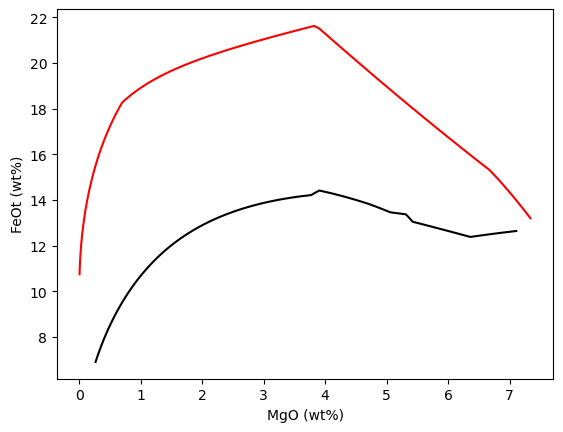

In [20]:
plt.plot(Isobaric_Xtal['H2O = 0.21 wt%']['All']['MgO_Liq'],Isobaric_Xtal['H2O = 0.21 wt%']['All']['FeOt_Liq'],
         '-r')
plt.plot(Isobaric_Xtal['H2O = 3.05 wt%']['All']['MgO_Liq'],Isobaric_Xtal['H2O = 3.05 wt%']['All']['FeOt_Liq'],
         '-k')
plt.xlabel('MgO (wt%)')
plt.ylabel('FeOt (wt%)')

## What is causing differences? 

In [21]:
Isobaric_Xtal['H2O = 0.21 wt%']['All']

,T_C,P_bar,h,s,v,dvdp,logfO2,SiO2_Liq,TiO2_Liq,Al2O3_Liq,...,Na2O_Ol,K2O_Ol,P2O5_Ol,H2O_Ol,CO2_Ol,Fe3Fet_Ol,h_Ol,mass_Ol,v_Ol,rho_Ol
0,1186.200000,1000.0,-1.188333e+06,264.697387,36.464710,-0.000170,-9.383183,49.758669,1.504288,13.812630,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
1,1184.198601,1000.0,-1.163077e+06,259.063160,35.714201,-0.000163,-9.406081,49.741841,1.537535,13.761029,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
2,1182.197203,1000.0,-1.132439e+06,252.540564,34.814355,-0.000160,-9.429041,49.724121,1.570886,13.709573,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
3,1180.195804,1000.0,-1.103153e+06,246.300153,33.953535,-0.000157,-9.452065,49.705490,1.604380,13.658203,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
4,1178.194406,1000.0,-1.075107e+06,240.318492,33.128489,-0.000154,-9.475152,49.685918,1.638068,13.606850,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,954.037762,1000.0,-1.476057e+05,30.533326,4.898303,-0.000036,-12.537455,67.700832,0.303388,7.540457,...,0.0,0.0,0.0,0.0,0.0,0.0,-214.243728,0.032368,0.007661,4.225224
117,952.036364,1000.0,-1.464856e+05,30.241523,4.860525,-0.000036,-12.569844,67.923890,0.297310,7.488091,...,0.0,0.0,0.0,0.0,0.0,0.0,-207.308739,0.031391,0.007423,4.229011
118,950.034965,1000.0,-1.453901e+05,29.956090,4.823557,-0.000036,-12.602339,68.145075,0.291431,7.436051,...,0.0,0.0,0.0,0.0,0.0,0.0,-200.711034,0.030459,0.007196,4.232719
119,948.033566,1000.0,-1.443178e+05,29.676688,4.787356,-0.000036,-12.634941,68.364567,0.285753,7.384378,...,0.0,0.0,0.0,0.0,0.0,0.0,-194.485196,0.029578,0.006982,4.236345


In [23]:
Isobaric_Xtal['H2O = 0.21 wt%']['Mass']

,liquid1,clinopyroxene1,plagioclase1,clinopyroxene2,spinel1,olivine1
0,97.953341,1.653853,0.391710,0.0,0.000000,0.000000
1,95.541125,1.427063,0.989503,0.0,0.000000,0.000000
2,93.233742,1.363482,0.948254,0.0,0.000000,0.000000
3,91.022414,1.305178,0.910503,0.0,0.000000,0.000000
4,88.898989,1.251747,0.876032,0.0,0.000000,0.000000
...,...,...,...,...,...,...
115,12.004452,0.025773,0.054910,0.0,0.009795,0.033386
116,11.892683,0.025574,0.053776,0.0,0.009502,0.032368
117,11.783435,0.025416,0.052676,0.0,0.009217,0.031391
118,11.676573,0.025308,0.051609,0.0,0.008941,0.030459


liquid1
clinopyroxene1
plagioclase1
clinopyroxene2
spinel1
olivine1


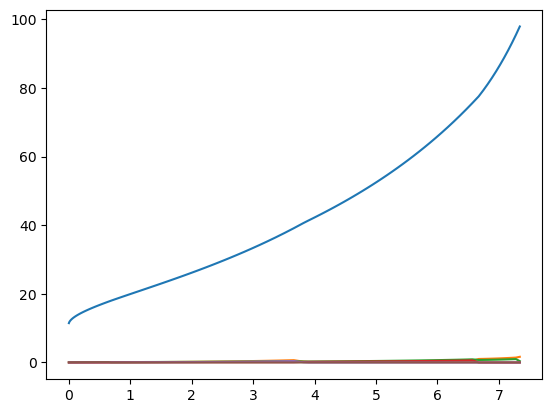

In [23]:
x='MgO_Liq'
for col in Isobaric_Xtal['H2O = 0.21 wt%']['Mass'].columns:
    print(col)
    plt.plot(Isobaric_Xtal['H2O = 0.21 wt%']['All'][x],
             Isobaric_Xtal['H2O = 0.21 wt%']['Mass'][col], '-')


In [24]:
Isobaric_Xtal['H2O = 3.05 wt%']['Mass'].head()

,liquid1,olivine1,fluid1,clinopyroxene1,plagioclase1,clinopyroxene2,spinel1
0,98.631521,0.450275,0.922416,0.0,0.0,0.0,0.0
1,98.428903,0.201583,0.002584,0.0,0.0,0.0,0.0
2,98.227229,0.200660,0.002564,0.0,0.0,0.0,0.0
3,98.026483,0.199752,0.002544,0.0,0.0,0.0,0.0
4,97.826651,0.198859,0.002524,0.0,0.0,0.0,0.0
